# Bike Sharing in Washinton D.C.

https://www.kaggle.com/marklvl/bike-sharing-dataset/downloads/bike-sharing-dataset.zip/1

# link to the report

https://docs.google.com/document/d/e/2PACX-1vSb11EzJqKkrraxEqFimnGPVwuJO5G65YeldGviiXzatWGyGI30z0MjG4JA8oUjy0GNP9-fK0wg1CMe/pub

https://www.kaggle.com/marklvl/bike-sharing-dataset/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\users\musht\data\hour.csv",engine='python',encoding='ascii',header=0)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
#check missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [6]:
# check for outlier
#identify outlier use IQR Method
#for PTRATIO
import numpy as np

def outliers_iqr(ys):
    hold_outliers=[]
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    hold=[x for x in ys if x> upper_bound or x <lower_bound]
    #return np.where((ys > upper_bound) | (ys < lower_bound))
    return hold
out=outliers_iqr(df['cnt'])
np.array(out)

array([651, 644, 712, 676, 734, 662, 782, 749, 713, 746, 651, 686, 690,
       679, 685, 648, 721, 801, 750, 801, 729, 779, 649, 810, 801, 662,
       957, 830, 686, 657, 664, 684, 644, 658, 654, 703, 681, 729, 757,
       800, 684, 744, 759, 822, 698, 655, 643, 646, 692, 744, 704, 656,
       738, 671, 678, 678, 660, 658, 681, 712, 676, 673, 781, 775, 677,
       748, 776, 700, 819, 668, 649, 691, 654, 732, 709, 664, 702, 654,
       653, 683, 664, 681, 743, 666, 729, 813, 704, 706, 643, 769, 680,
       717, 710, 705, 732, 770, 779, 659, 678, 733, 650, 873, 846, 852,
       868, 745, 812, 669, 704, 730, 672, 645, 785, 785, 719, 692, 798,
       752, 653, 781, 710, 671, 839, 796, 693, 827, 785, 694, 668, 679,
       647, 702, 644, 684, 686, 678, 644, 662, 665, 834, 822, 645, 710,
       850, 790, 668, 724, 782, 681, 869, 813, 700, 793, 723, 651, 800,
       831, 681, 653, 713, 857, 744, 671, 719, 867, 823, 653, 823, 693,
       723, 673, 811, 795, 643, 691, 672, 646, 833, 791, 656, 90

Although 505 bike riders seem outliers based on the inter-quartile range, which constitutes 3% of total instances are not considered outlier because number of bike riders are directly proportional to weather and may be other factors;

In [7]:
# let's change the name of season instead of 1,2,3,4 - change season to SEASON

df['SEASON']=df['season'].apply(lambda x: 'spring' if x==1 else 'summer'  if  x==2 else 'fall' if x==3 else 'winter')

In [8]:
df.groupby('SEASON').count()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
SEASON,,,,,,,,,,,,,,,,,
fall,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496
spring,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
summer,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409
winter,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232


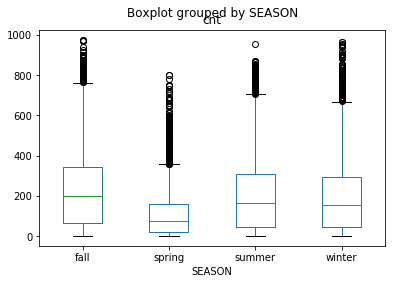

In [9]:
df.boxplot(by='SEASON', 
                       column=['cnt'], 
                       grid=False)

In [10]:
# create four separate datasets based on the four seaons
season_data=df.groupby('SEASON')
season_data.first()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
SEASON,,,,,,,,,,,,,,,,,
fall,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33
spring,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
summer,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.3030,0.66,0.3881,2,11,13
winter,6251,2011-09-23,4,0,9,0,0,5,1,2,0.62,0.5455,0.94,0.0896,11,41,52


In [11]:
spring_data=season_data.get_group('spring')
summer_data=season_data.get_group('summer')
fall_data=season_data.get_group('fall')
winter_data=season_data.get_group('winter')


In [12]:
df.groupby('SEASON')['cnt'].mean()

SEASON
fall      236.016237
spring    111.114569
summer    208.344069
winter    198.868856
Name: cnt, dtype: float64

mean of number of bikes is highest in the fall and lowest in spring

In [13]:
# lets looks at the number of hours by the hour
hr_group=df.groupby('hr')['cnt'].sum()

In [14]:
hr_group

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

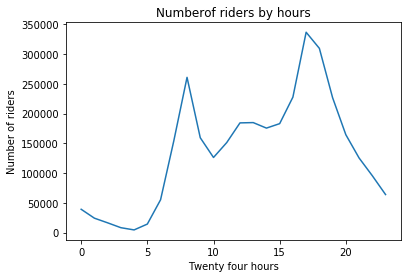

In [15]:
plt.plot(hr_group.index,hr_group)
plt.title("Numberof riders by hours")
plt.xlabel("Twenty four hours")
plt.ylabel("Number of riders")

In [16]:
# lets looks at the month of the number of bikes
mnth_group=df.groupby('mnth')['cnt'].sum()

In [17]:
mnth_group

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

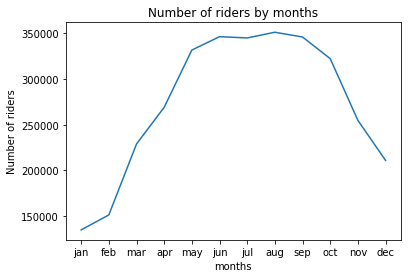

In [18]:
plt.plot(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], mnth_group)
plt.title("Number of riders by months")
plt.xlabel("months")
plt.ylabel("Number of riders")

In [19]:
# now lets look at the impact of holiday or weekend
wkday_group=df.groupby('weekday')['cnt'].sum()

In [20]:
wkday_group

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

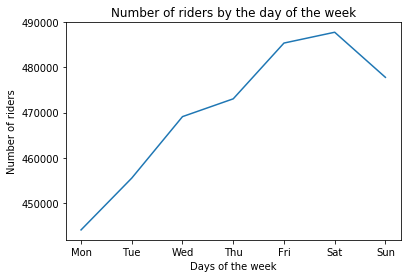

In [21]:
plt.plot(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],wkday_group)
plt.title("Number of riders by the day of the week")
plt.xlabel("Days of the week")
plt.ylabel("Number of riders")

In [22]:
# now look at weather situation
# now lets look at the impact of holiday or weekend
weather_group=df.groupby('weathersit')['cnt'].sum()


In [23]:
weather_group

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

Text(0, 0.5, 'Number of riders')

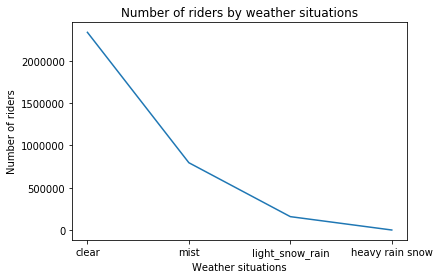

In [24]:
plt.plot(['clear','mist','light_snow_rain', 'heavy rain snow'], weather_group)
plt.title("Number of riders by weather situations")
plt.xlabel("Weather situations")
plt.ylabel("Number of riders")

In [25]:
# count casual and registered
casual_register=df[['casual','registered']].sum()

In [26]:
casual_register

casual         620017
registered    2672662
dtype: int64

In [27]:
type(casual_register)

pandas.core.series.Series

<BarContainer object of 2 artists>

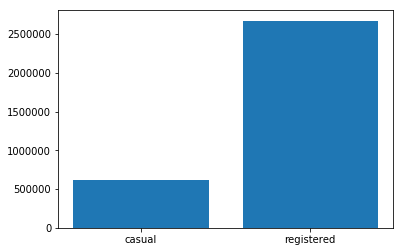

In [28]:
plt.bar(['casual','registered'],casual_register)

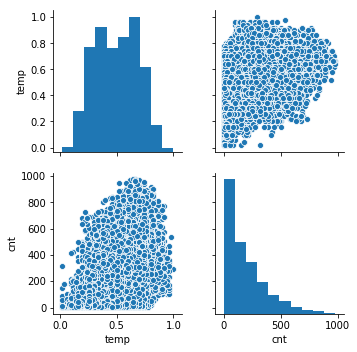

In [29]:
import seaborn as sns
temp=df[['temp','cnt']]
sns.pairplot(temp,kind="scatter")

In [30]:
spring_data_hr=spring_data.groupby('hr')['cnt'].sum()
summer_data_hr=summer_data.groupby('hr')['cnt'].sum()
fall_data_hr=fall_data.groupby('hr')['cnt'].sum()
winter_data_hr=winter_data.groupby('hr')['cnt'].sum()

In [31]:
all_data_hr=pd.DataFrame(list(zip(spring_data_hr,summer_data_hr,fall_data_hr,winter_data_hr)),columns=['Spring','Summer','Fall','Winter'])

In [32]:
all_data_hr

,Spring,Summer,Fall,Winter
0,4878,10459,13822,9971
1,3229,6481,8132,6322
2,2175,4302,5716,4159
3,1108,2084,2930,2052
4,490,1118,1541,1279
5,1830,3508,4947,3976
6,7261,14549,18946,14376
7,20655,40753,52000,40763
8,42095,69945,79204,69757
9,26316,43053,47927,42142


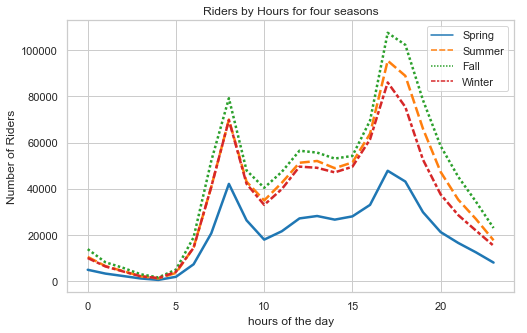

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plt.title('Riders by Hours for four seasons')
plt.xlabel('hours of the day')
plt.ylabel('Number of Riders')
#g=sns.lineplot(data=all_data_hr, palette="tab10", linewidth=2.5)
sns.lineplot(data=all_data_hr, palette="tab10", linewidth=2.5)



In [34]:
spring_data_mnth=spring_data.groupby('mnth')['cnt'].sum()
summer_data_mnth=summer_data.groupby('mnth')['cnt'].sum()
fall_data_mnth=fall_data.groupby('mnth')['cnt'].sum()
winter_data_mnth=winter_data.groupby('mnth')['cnt'].sum()

In [35]:
# now compare years and seasons
year_2011=df[df['yr']==0]
year_2012=df[df['yr']==1]
print (year_2011.shape, year_2012.shape)

(8645, 18) (8734, 18)


In [36]:
year_2011['cnt'].mean()

143.79444765760556

In [37]:
year_2011['cnt'].std()

133.79785413838638

In [38]:
year_2012['cnt'].mean()

234.6663613464621

In [39]:
year_2012['cnt'].std()

208.91094098639914

In [40]:
year11_gr_season=year_2011.groupby('SEASON')['cnt'].sum()
year11_gr_season

SEASON
fall      419650
spring    150000
summer    347316
winter    326137
Name: cnt, dtype: int64

In [41]:
year12_gr_season=year_2012.groupby('SEASON')['cnt'].sum()
year12_gr_season

SEASON
fall      641479
spring    321348
summer    571273
winter    515476
Name: cnt, dtype: int64

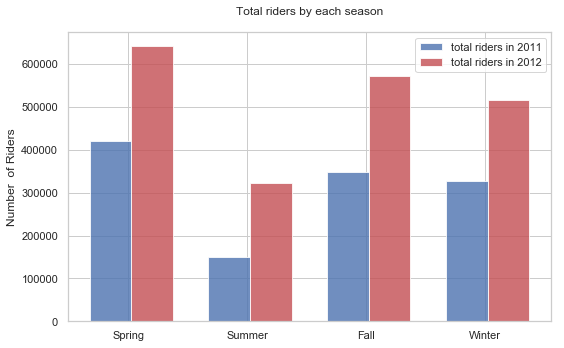

In [42]:
# create plot
import matplotlib as mpl
index = np.arange(4)
#fig, ax = plt.subplots()
plt.figure(figsize=(8,5))
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fake=['A','B','C','D']
first = plt.bar(fake, year11_gr_season, bar_width,
alpha=opacity,
color='b',
label='total riders in 2011')

second = plt.bar(index + bar_width, year12_gr_season, bar_width, alpha=opacity,color='r',label='total riders in 2012')
#plt.xlabel('\nBlue indicates total population for each group and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of Riders')
plt.title('Total riders by each season\n')
plt.xticks(index + bar_width-.2, ('Spring','Summer','Fall','Winter'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [43]:
tt=year_2011[['casual','registered']].sum()
tt

casual        247252
registered    995851
dtype: int64

In [44]:
tt=year_2012[['casual','registered']].sum()
tt

casual         372765
registered    1676811
dtype: int64

In [45]:
casual_increase=100*(372765-247252)/247252
casual_increase

50.763188973193344

In [46]:
registered_increase=100*(1676811-995851)/1676811
registered_increase

40.610420613891485

In [47]:
actual_casual_increase=372765-247252
actual_casual_increase

125513

In [48]:
actual_registered_increase=1676811-995851
actual_registered_increase

680960

In [49]:
list1=[372765,1676811]
list2=[247252,995851]
list3=[125513,680960]

In [50]:

list1=[247252,995851]
list2=[372765,1676811]
list3=[125513,680960]

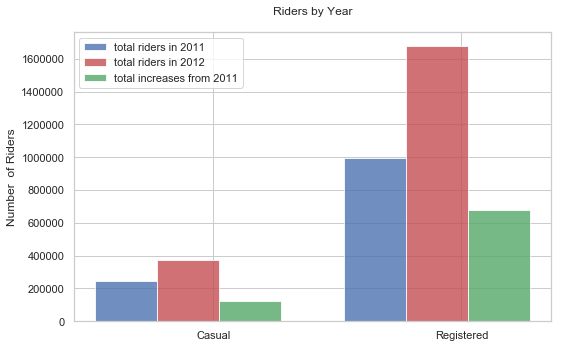

In [51]:
# create plot
import matplotlib as mpl
index = np.arange(2)
#fig, ax = plt.subplots()
plt.figure(figsize=(8,5))
#index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

fake=['A','B']
first = plt.bar(fake, list1, bar_width,
alpha=opacity,
color='b',
label='total riders in 2011')

second = plt.bar(index + bar_width, list2, bar_width, alpha=opacity,color='r',label='total riders in 2012')

third = plt.bar(index + bar_width+bar_width, list3, bar_width, alpha=opacity,color='g',label='total increases from 2011')

#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of Riders')
plt.title('Riders by Year\n')
plt.xticks(index + bar_width+.1, ('Casual','Registered'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [52]:
# see number of riders by temperature situations - clear, mist, light, heavey
df_weather=df.groupby('weathersit')['cnt'].sum()

Text(0, 0.5, 'Number of riders')

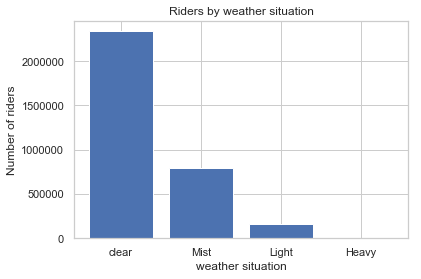

In [53]:
plt.bar(['clear','Mist','Light','Heavy'],df_weather)
plt.title("Riders by weather situation")
plt.xlabel("weather situation")
plt.ylabel("Number of riders")

# statistical analysis
1. test means of total riders by year - check for normality and/or perform log transformation
2. test for means of casul riders and registered riders - check for normality and/or perform log transformation


# check means of total riders by year

(array([ 109.,  262.,  412.,  544.,  573.,  776., 1253., 1946., 1872.,
         898.]),
 array([0.        , 0.64785096, 1.29570193, 1.94355289, 2.59140386,
        3.23925482, 3.88710579, 4.53495675, 5.18280771, 5.83065868,
        6.47850964]),
 <a list of 10 Patch objects>)

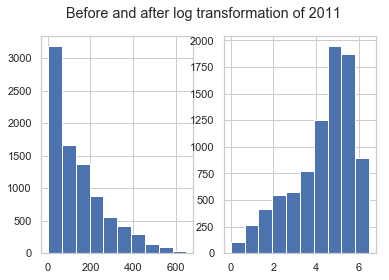

In [54]:
# look at the data before and after log transformation
fig, axs = plt.subplots(1,2)
fig.suptitle('Before and after log transformation of 2011')
axs[0].hist(year_2011['cnt'])
axs[1].hist(np.log(year_2011['cnt']))

(array([  49.,  170.,  402.,  505.,  537.,  675.,  977., 1944., 2289.,
        1186.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <a list of 10 Patch objects>)

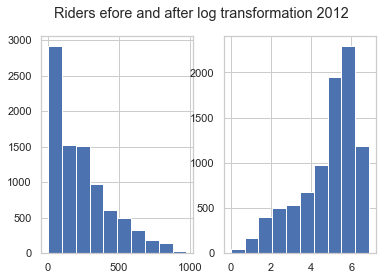

In [55]:
# look at the data before and after log transformation
fig, axs = plt.subplots(1,2)
fig.suptitle('Riders efore and after log transformation 2012 ')
axs[0].hist(year_2012['cnt'])
axs[1].hist(np.log(year_2012['cnt']))

In [56]:
# perform a test now
from scipy import stats
t2, p2 = stats.ttest_ind(np.log(year_2011['cnt']),np.log(year_2012['cnt']))
print("t = " + str(t2))
print("p = " + str(p2))


t = -22.160400484938148
p = 2.5301602945983702e-107


In [57]:
# perform a test now
from scipy import stats
t2, p2 = stats.ttest_ind(df['casual'],df['registered'])
print("t = " + str(t2))
print("p = " + str(p2))



t = -97.81332643791566
p = 0.0


now test any significant differene between casual and register riders

# Now prepare the data for the machine learning

In [58]:
df_machine=df.copy()
df_machine=df_machine.drop('SEASON', axis=1) # used in data story so just removed it'
df_machine.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
# Now drop all unnecessary variables such as instant, date
del df_machine['instant']



In [60]:
del df_machine['dteday']


In [61]:
#save registere riders for later use
yy=df_machine['registered']

In [62]:
#save casual for later use
yyy=df_machine['casual']

In [63]:
del df_machine['casual']

In [64]:
del df_machine['registered']

In [65]:
df_machine.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [66]:
#Since all categorical variables entered as int, but convert them into string and then into dummy variables
# The variables are season, yr,mnth,hr,holiday,weekday,workingday,weathersit
cat_variables=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
cat_variablesD=['seasonD','yrD','mnthD','hrD','holidayD','weekdayD','workingdayDD','weathersit']
df_machine[cat_variablesD]=df_machine[cat_variables].astype(str)


In [67]:
df_machine.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,seasonD,yrD,mnthD,hrD,holidayD,weekdayD,workingdayDD
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0,1,0,0,6,0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0,1,1,0,6,0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0,1,2,0,6,0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0,1,3,0,6,0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0,1,4,0,6,0


In [68]:
# now remove all original variables
df_machine.drop(cat_variables,axis=1,inplace=True)

In [69]:
df_machine.head()

,temp,atemp,hum,windspeed,cnt,seasonD,yrD,mnthD,hrD,holidayD,weekdayD,workingdayDD
0,0.24,0.2879,0.81,0.0,16,1,0,1,0,0,6,0
1,0.22,0.2727,0.80,0.0,40,1,0,1,1,0,6,0
2,0.22,0.2727,0.80,0.0,32,1,0,1,2,0,6,0
3,0.24,0.2879,0.75,0.0,13,1,0,1,3,0,6,0
4,0.24,0.2879,0.75,0.0,1,1,0,1,4,0,6,0


In [70]:
df_machine.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'seasonD', 'yrD', 'mnthD',
       'hrD', 'holidayD', 'weekdayD', 'workingdayDD'],
      dtype='object')

In [71]:
# now convert to dummy variables
df_machine=pd.get_dummies(df_machine)

In [72]:
df_machine.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'seasonD_1', 'seasonD_2',
       'seasonD_3', 'seasonD_4', 'yrD_0', 'yrD_1', 'mnthD_1', 'mnthD_10',
       'mnthD_11', 'mnthD_12', 'mnthD_2', 'mnthD_3', 'mnthD_4', 'mnthD_5',
       'mnthD_6', 'mnthD_7', 'mnthD_8', 'mnthD_9', 'hrD_0', 'hrD_1', 'hrD_10',
       'hrD_11', 'hrD_12', 'hrD_13', 'hrD_14', 'hrD_15', 'hrD_16', 'hrD_17',
       'hrD_18', 'hrD_19', 'hrD_2', 'hrD_20', 'hrD_21', 'hrD_22', 'hrD_23',
       'hrD_3', 'hrD_4', 'hrD_5', 'hrD_6', 'hrD_7', 'hrD_8', 'hrD_9',
       'holidayD_0', 'holidayD_1', 'weekdayD_0', 'weekdayD_1', 'weekdayD_2',
       'weekdayD_3', 'weekdayD_4', 'weekdayD_5', 'weekdayD_6',
       'workingdayDD_0', 'workingdayDD_1'],
      dtype='object')

In [73]:
len(df_machine.columns)

58

In [74]:
# Now drop regression variable cnt
X=df_machine.drop('cnt',axis=1)

In [75]:
len(X.columns)# total predictor variables with dummy

57

In [76]:
# total predictors with dummy variables
len(X.columns)

57

In [77]:
X.columns # regressor variable cnt has been dropped

Index(['temp', 'atemp', 'hum', 'windspeed', 'seasonD_1', 'seasonD_2',
       'seasonD_3', 'seasonD_4', 'yrD_0', 'yrD_1', 'mnthD_1', 'mnthD_10',
       'mnthD_11', 'mnthD_12', 'mnthD_2', 'mnthD_3', 'mnthD_4', 'mnthD_5',
       'mnthD_6', 'mnthD_7', 'mnthD_8', 'mnthD_9', 'hrD_0', 'hrD_1', 'hrD_10',
       'hrD_11', 'hrD_12', 'hrD_13', 'hrD_14', 'hrD_15', 'hrD_16', 'hrD_17',
       'hrD_18', 'hrD_19', 'hrD_2', 'hrD_20', 'hrD_21', 'hrD_22', 'hrD_23',
       'hrD_3', 'hrD_4', 'hrD_5', 'hrD_6', 'hrD_7', 'hrD_8', 'hrD_9',
       'holidayD_0', 'holidayD_1', 'weekdayD_0', 'weekdayD_1', 'weekdayD_2',
       'weekdayD_3', 'weekdayD_4', 'weekdayD_5', 'weekdayD_6',
       'workingdayDD_0', 'workingdayDD_1'],
      dtype='object')

In [78]:
# Now isolate y - regressor variable
y=df_machine['cnt'].astype(float)

# final  phase - split the data into training and testing

In [79]:
# Now split the data for machine learning
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
print ('X_train ',X_train.shape)
print ('X_test ',X_test.shape)
print ('y_train ',y_train.shape)
print ('y_test ',y_test.shape)

X_train  (11643, 57)
X_test  (5736, 57)
y_train  (11643,)
y_test  (5736,)


# Now start running algorithm

## Linear regression


In [80]:

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

lrReg=linear_model.LinearRegression(fit_intercept=False)
# Train the model using the training sets
lrReg.fit(X_train,y_train)
# Make predictions
y_pred_lr_train=lrReg.predict(X_train)
y_pred_lr_test = lrReg.predict(X_test)


In [81]:
lrReg

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [82]:
mse_train=mean_squared_error(y_train,y_pred_lr_train)
r2_train=r2_score(y_train,y_pred_lr_train)

mse_test=mean_squared_error(y_test,y_pred_lr_test)
r2_test=r2_score(y_test,y_pred_lr_test)
print ("linear regresion")
print ("Mean Squared Error for train data ",mse_train)
print ("R_Squared for train data  ",r2_train)

print ("Mean Squared Error for test data ",mse_test)
print ("R_Squared for test data  ",r2_test)

r=str(round((pearsonr(y_test, y_pred_lr_test)[0]),2))
print ('correlation between observed and predicted ',r)

linear regresion
Mean Squared Error for train data  10615.750122021822
R_Squared for train data   0.6819913889001803
Mean Squared Error for test data  10530.899298004193
R_Squared for test data   0.6698927729983419
correlation between observed and predicted  0.82


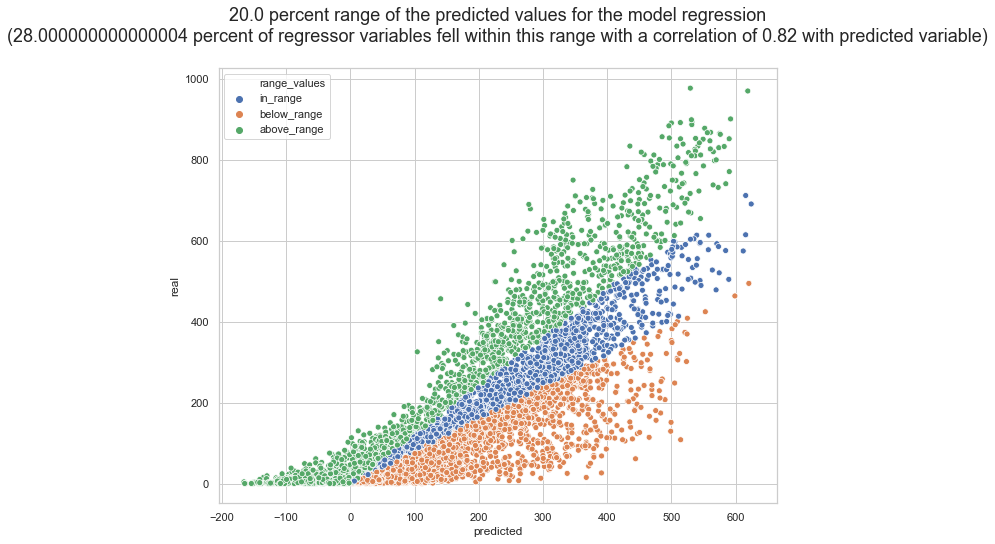

In [83]:
# Function that displays a certain percent of plus, minus range of predicted values along with other relevant information
 # the latest trying if does not work erase   
def watch_visually(real, predicted,bound,model):
    xx=list(zip(real,predicted))
    datac=pd.DataFrame(xx, columns=['real', 'predicted'])
    datac['hue_pred_higher']=datac['predicted']*(1+bound/100)
    datac['hue_pred_lower']=datac['predicted']*(1-bound/100)
    hold=[]
    for i in datac.index:
        valhigh = datac.loc[i,'hue_pred_higher']
        vallow=datac.loc[i,'hue_pred_lower']
        if datac.loc[i,'real']> valhigh:
             hold.append('above_range')
        elif datac.loc[i,'real']<vallow:
            hold.append('below_range')
        else:
            hold.append('in_range')
            
    datac['range_values']=hold
    datac['count']=datac['range_values'].apply(lambda x: 1 if x == 'in_range' else 0)
    percent=datac['count'].sum()/len(datac.index)
    r=str(round((pearsonr(real, predicted)[0]),2))
    
    import seaborn as sns
    plt.figure(figsize=(10,8))
    temp=str(bound)
    per=round(percent,2)*100
    per=str(per)
    plt.title( temp+ " percent range of the predicted values for the model " +model+"\n("+per+ ' percent of regressor variables fell within this range with a correlation of '+r+ ' with predicted variable)\n', size=18)
    #plt.xlabel("Weight")
    #plt.ylabel("Height")
    g =sns.scatterplot(x="predicted", y="real", hue="range_values", data=datac)

watch_visually(y_test, y_pred_lr_test,20.0, "regression")

In [86]:
from scipy.stats.stats import pearsonr
pearsonr(y_test, y_pred_lr_test)

(0.8186514083029293, 0.0)

In [105]:
# The coefficients
print('Coefficients: \n', lrReg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_lr_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred_lr_test))


Coefficients: 
 [ 7.50143702e+01  1.77584104e+02 -1.34217817e+02 -4.97971914e+01
  1.80640945e+13  1.80640945e+13  1.80640945e+13  1.80640945e+13
 -9.30576426e+13 -9.30576426e+13  7.61321112e+12  7.61321112e+12
  7.61321112e+12  7.61321112e+12  7.61321112e+12  7.61321112e+12
  7.61321112e+12  7.61321112e+12  7.61321112e+12  7.61321112e+12
  7.61321112e+12  7.61321112e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  4.16896961e+12  4.16896961e+12
  4.16896961e+12  4.16896961e+12  2.56926737e+13  1.82176365e+13
 -5.55018632e+11  6.92001853e+12  6.92001853e+12  6.92001853e+12
  6.92001853e+12  6.92001853e+12 -5.55018632e+11  3.80737124e+13
  3.05986752e+13]
Mean squared error: 10530.90
Variance score: 0.67


In [106]:
temppd=list(lrReg.coef_)
temppd

[75.01437023945373,
 177.5841039766139,
 -134.21781688689674,
 -49.7971913874392,
 18064094474336.066,
 18064094474370.55,
 18064094474370.77,
 18064094474406.594,
 -93057642626285.23,
 -93057642626200.47,
 7613211124353.604,
 7613211124366.303,
 7613211124340.994,
 7613211124345.904,
 7613211124351.249,
 7613211124365.617,
 7613211124362.362,
 7613211124377.298,
 7613211124357.966,
 7613211124339.324,
 7613211124357.363,
 7613211124387.805,
 4168969613189.4697,
 4168969613175.77,
 4168969613298.299,
 4168969613319.888,
 4168969613357.1904,
 4168969613354.451,
 4168969613327.99,
 4168969613331.0938,
 4168969613404.6885,
 4168969613567.7783,
 4168969613517.908,
 4168969613421.495,
 4168969613163.298,
 4168969613344.831,
 4168969613295.1665,
 4168969613260.1924,
 4168969613220.3496,
 4168969613152.966,
 4168969613151.2393,
 4168969613171.001,
 4168969613228.008,
 4168969613361.5596,
 4168969613507.035,
 4168969613352.2676,
 25692673664141.953,
 18217636507329.637,
 -555018631700.0117,
 6

Coefficients are high, mean squared high as well as r^2.
We definitely need to tune the parameter.


In [107]:
# let's try a polynomial fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.9126635233605398
Test Score: 0.9031017391781089


In [108]:
y_pred_ridge=ridge_pipe.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_ridge))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test,y_pred_ridge))

Mean squared error: 3091.20
Variance score: 0.9031


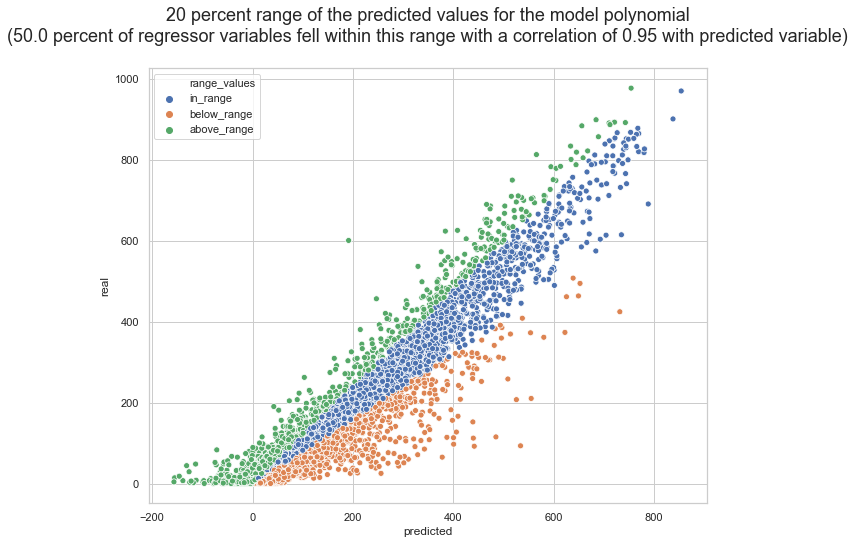

In [109]:
y_predict_ridge=ridge_pipe.predict(X_test)
watch_visually(y_test, y_predict_ridge,20, 'polynomial')


In [112]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# now convert X_test to polynomial=2
X_test_poly=PolynomialFeatures(degree=2).fit_transform(X_test)

y_poly_pred_train=model.predict(X_train_poly)
y_poly_pred_test = model.predict(X_test_poly)

rmse_train = mean_squared_error(y_train,y_poly_pred_train)
r2_train = r2_score(y_train,y_poly_pred_train)

rmse_test = mean_squared_error(y_test,y_poly_pred_test)
r2_test = r2_score(y_test,y_poly_pred_test)
r=pearsonr(y_test,y_poly_pred_test)

print(' polynomial regression ')
print('Mean_squared_mean for training data ', rmse_train)
print("R_squared for training  data ", r2_train)

print('Mean_squared_mean test data ', rmse_test)
print("R_squared for train data ", r2_test)
print ("correlation between oberverd and predictied " ,r)






 polynomial regression 
Mean_squared_mean for training data  2631.2684794511724
R_squared for training  data  0.9211769281527102
Mean_squared_mean test data  3046.7403610421024
R_squared for train data  0.90449523981601
correlation between oberverd and predictied  (0.9511177128837452, 0.0)


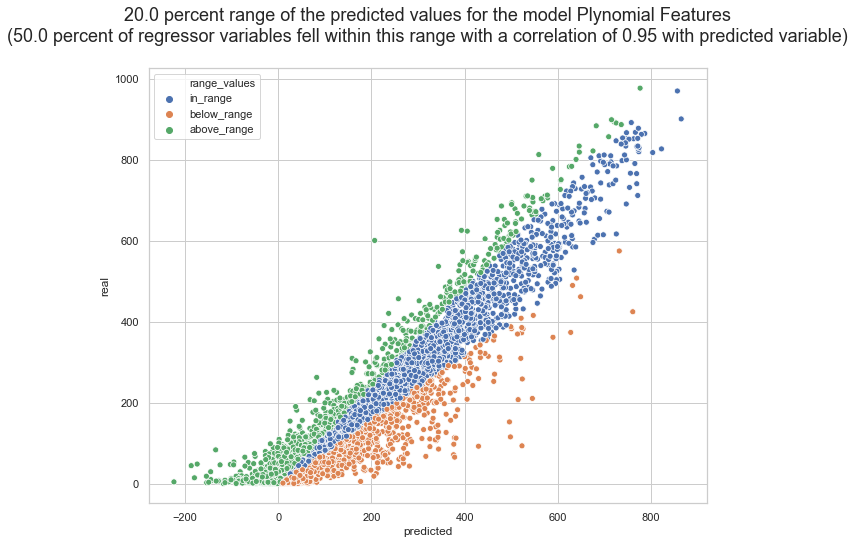

In [113]:
watch_visually(y_test,y_poly_pred_test,20.0,"Plynomial Features")

In [115]:
from sklearn.linear_model import Ridge
#rr = Ridge(alpha=0.01)
rr = Ridge(alpha=10)
rr.fit(X_train,y_train)
print(mean_squared_error(y_test,rr.predict(X_test)))
print(r2_score(y_test,rr.predict(X_test)))

10528.303153859351
0.6699741531274552


In [116]:
# now try ridge with transformed feature with degree 2. We already have that in a few earler cell
from sklearn.linear_model import Ridge
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly=polynomial_features.fit_transform(X_test)

rrf=Ridge(alpha=0.01)
rrf.fit(X_train_poly,y_train)

y_poly_pred_train=rrf.predict(X_train_poly)
y_poly_pred_test=rrf.predict(X_test_poly)
r=pearsonr(y_test,y_poly_pred_test)

print ('Ridge with polynomial feature')

print ('mean squared error train data  ', mean_squared_error(y_train, y_poly_pred_train))
print ("R_squard for train data ", r2_score(y_train, y_poly_pred_train))

print ('mean squared error for test data ', mean_squared_error(y_test, y_poly_pred_test))
print ("R_squard for test data", r2_score(y_test, y_poly_pred_test))
print ("correlation between observed and predicted ",r)

Ridge with polynomial feature
mean squared error train data   2625.8211516953074
R_squard for train data  0.9213401099452294
mean squared error for test data  3023.68993204658
R_squard for test data 0.9052177909468857
correlation between observed and predicted  (0.9514738080293806, 0.0)


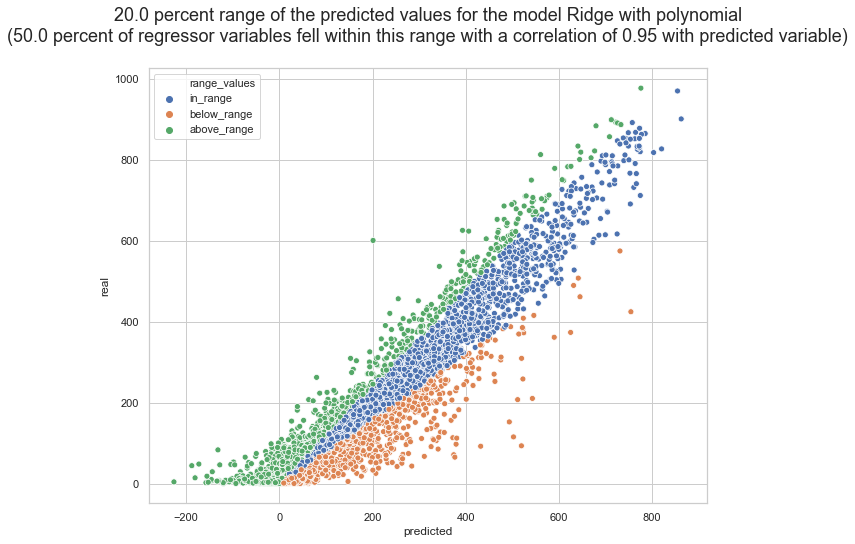

In [117]:
watch_visually(y_test, y_poly_pred_test,20.,'Ridge with polynomial')

In [118]:
from sklearn.linear_model import Lasso
#lasso=Lasso(alpha=0.01)
lasso=Lasso(alpha=0.01)
lasso=lasso.fit(X_train,y_train)
print(mean_squared_error(y_test,lasso.predict(X_test)))
print(r2_score(y_test,lasso.predict(X_test)))

10530.441551779564
0.6699071217574182


In [119]:
#list(lasso.coef_)
#print (list(zip(X_train.columns,lasso.coef_)))

In [120]:
mean_squared_error(y_test,lasso.predict(X_test))

10530.441551779564

Now try lasso and what happens

In [121]:
from sklearn.linear_model import Lasso
steps = [
    
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))


Training score: 0.8675336728202909
Test score: 0.8647759922592838


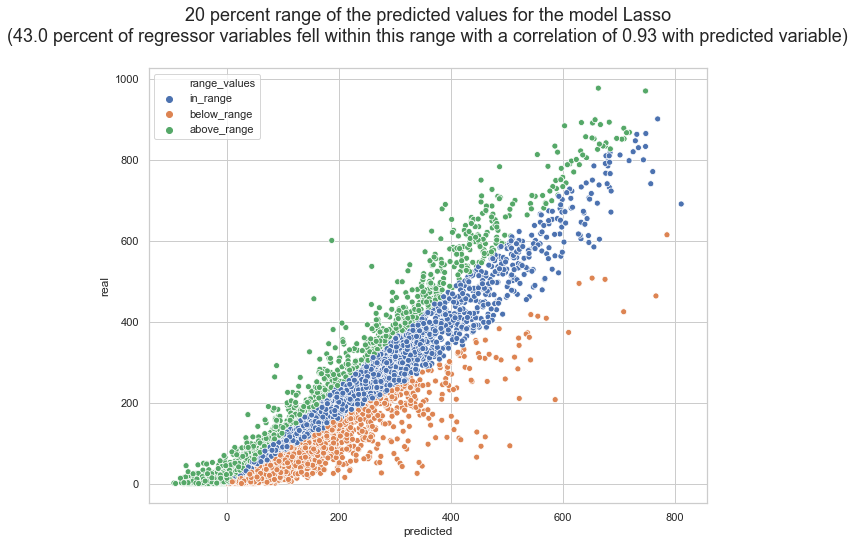

In [122]:
watch_visually(y_test,lasso_pipe.predict(X_test),20, 'Lasso')

## KNeighbors

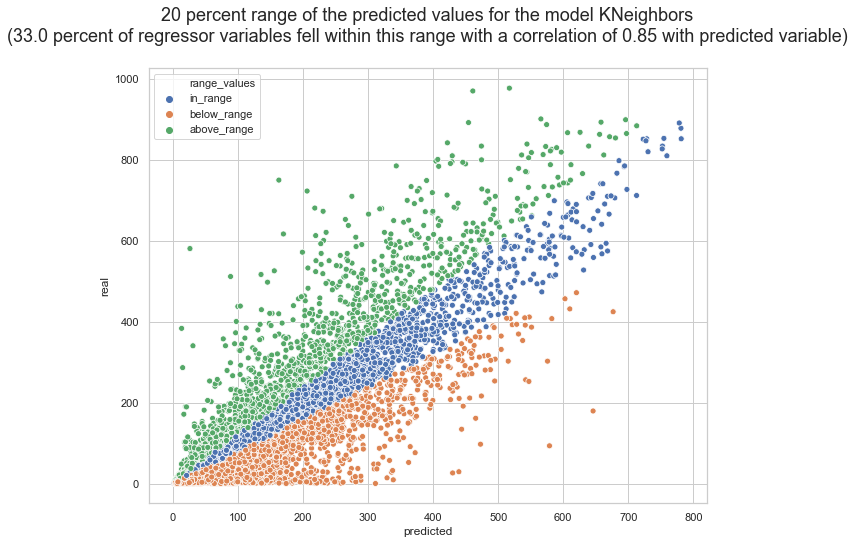

In [123]:
# Run default  used k-neigbors=5

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train) 
#print(neigh.predict(X))
y_pred=neigh.predict(X_test)
watch_visually(y_test, y_pred,20,'KNeighbors')

In [124]:
from sklearn.metrics import mean_squared_error, r2_score 
print("R-Squared on test dataset={}".format(r2_score(y_test,neigh.predict(X_test))))
print("Mean_Squared_erroe={} ".format(mean_squared_error(neigh.predict(X_test),y_test)))

R-Squared on test dataset=0.7192380733828212
Mean_Squared_erroe=8956.712649930267 


In [125]:
# gridsearch
#Gridsearch for KNeighbors
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
print ('best param ',knn_gscv.best_params_)
print ('best score ',knn_gscv.best_score_ )

best param  {'n_neighbors': 2}
best score  0.7240845988051838


In [126]:
Knn3=KNeighborsRegressor(n_neighbors=2)
Knn3.fit(X_train, y_train) 
#print(neigh.predict(X))
y_pred=Knn3.predict(X_test)
print("R-Squared on test dataset={}".format(r2_score(y_test,Knn3.predict(X_test))))
print("Mean_Squared_erroe={} ".format(mean_squared_error(Knn3.predict(X_test),y_test)))

R-Squared on test dataset=0.7603096648228844
Mean_Squared_erroe=7646.469316596932 


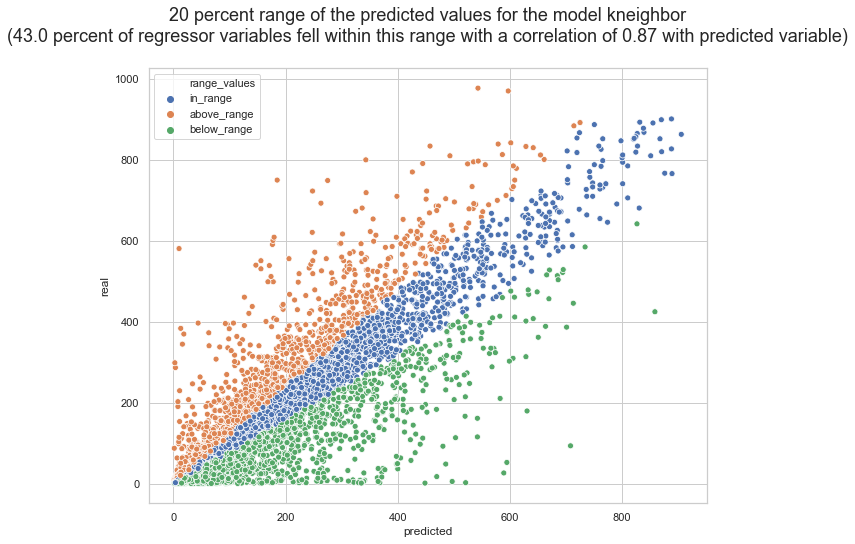

In [127]:
watch_visually(y_test,y_pred,20,"kneighbor")

# decision trees

In [128]:
#Decision trees - Default
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
lrTC = DecisionTreeRegressor()

# Train Decision Tree Classifer
lrTC = lrTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = lrTC.predict(X_test)
print("R-Squared on test dataset={}".format(lrTC.score(X_test,y_test)))
print("R-Squared on test dataset={}".format(r2_score(y_test,lrTC.predict(X_test))))
print("Mean_Squared_erroe={} ".format(mean_squared_error(lrTC.predict(X_test),y_test)))



R-Squared on test dataset=0.8234194949557018
R-Squared on test dataset=0.8234194949557018
Mean_Squared_erroe=5633.174206764295 


In [129]:
# Need grid search

#Gridsearch for decision trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeRegressor() 
lrDT_cv=GridSearchCV(clf_tree,parameters,cv=5) 
lrDT_cv.fit(X_train,y_train)
print (lrDT_cv.best_params_)



{'max_depth': 19, 'min_samples_split': 30}


In [130]:
clf_tree_final=DecisionTreeRegressor(max_depth=19, min_samples_split= 30)
clf_tree_final.fit(X_train, y_train)
print("R-Squared on test dataset={}".format(r2_score(y_test,clf_tree_final.predict(X_test))))
print("Mean_Squared_erroe={} ".format(mean_squared_error(clf_tree_final.predict(X_test),y_test)))

R-Squared on test dataset=0.8317150856111617
Mean_Squared_erroe=5368.53283370622 


In [131]:
print("R-Squared::{}".format(lrDT_cv.best_score_))
print("Best Hyperparameters::\n{}".format(lrDT_cv.best_params_))

R-Squared::0.8081006797264426
Best Hyperparameters::
{'max_depth': 19, 'min_samples_split': 30}


# RandomForest

In [132]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
clfrf = RandomForestRegressor()
clrf=clfrf.fit(X_train, y_train)


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [133]:
clfrf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [134]:
print ("for random forest")
print("R-Squared on training dataset={}".format(r2_score(y_train,clfrf.predict(X_train))))
print("Mean_Squared_error on training dataset={} ".format(mean_squared_error(y_train, clfrf.predict(X_train))))

print("R-Squared on test dataset={}".format(r2_score(y_test,clfrf.predict(X_test))))
print("Mean_Squared_erroe={} ".format(mean_squared_error(clfrf.predict(X_test),y_test)))
r=pearsonr(y_test,clrf.predict(X_test))
print ("correlation between observed and predicted ",r)

for random forest
R-Squared on training dataset=0.9810840429317971
Mean_Squared_error on training dataset=631.4516857277923 
R-Squared on test dataset=0.9005403985198909
Mean_Squared_erroe=3172.9055341202734 
correlation between observed and predicted  (0.9490903373626335, 0.0)


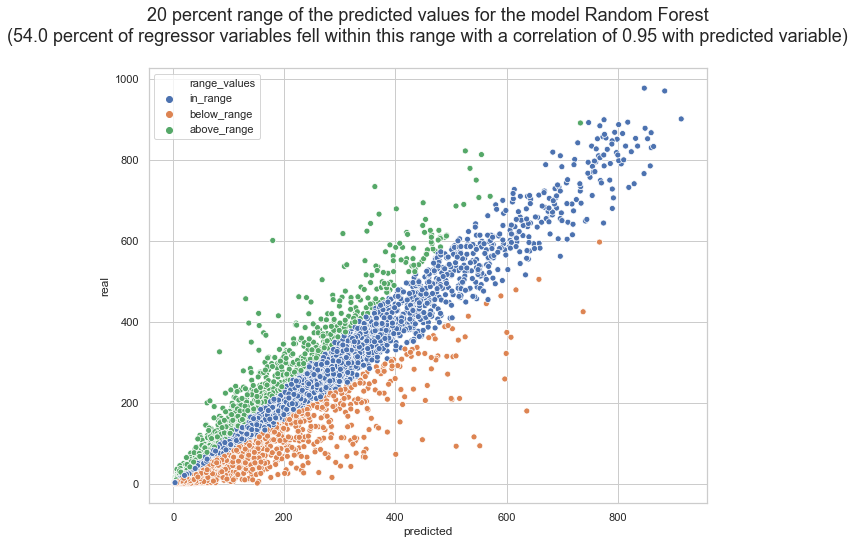

In [135]:
watch_visually(y_test,clfrf.predict(X_test),20, 'Random Forest')

In [136]:
from sklearn.metrics import mean_squared_error, r2_score 
sample_leaf_options = [1,2,3,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    model = RandomForestRegressor(max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X_train,y_train) 
    print ('for leaf size ',model.min_samples_leaf)
    print("R-Squared on training dataset={}".format(r2_score(y_train,model.predict(X_train))))
    print("Mean_Squared_error on training dataset={} ".format(mean_squared_error(y_train, model.predict(X_train))))

    print("R-Squared on test dataset={}".format(r2_score(y_test,model.predict(X_test))))
    print("Mean_Squared_erroe={} ".format(mean_squared_error(model.predict(X_test),y_test)))

C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  1
R-Squared on training dataset=0.9815308086668185
Mean_Squared_error on training dataset=616.5377706936451 
R-Squared on test dataset=0.9001256744190476
Mean_Squared_erroe=3186.1358344142263 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  2
R-Squared on training dataset=0.9684428409491421
Mean_Squared_error on training dataset=1053.4397602826332 
R-Squared on test dataset=0.8980722335400203
Mean_Squared_erroe=3251.6435765738142 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  3
R-Squared on training dataset=0.9568113120166386
Mean_Squared_error on training dataset=1441.722971411672 
R-Squared on test dataset=0.8977038796186124
Mean_Squared_erroe=3263.3946008928056 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  5
R-Squared on training dataset=0.9323648596962948
Mean_Squared_error on training dataset=2257.7934177595253 
R-Squared on test dataset=0.879858688107478
Mean_Squared_erroe=3832.6820910949255 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  10
R-Squared on training dataset=0.8851846599891383
Mean_Squared_error on training dataset=3832.7608661757185 
R-Squared on test dataset=0.8484235503772519
Mean_Squared_erroe=4835.508575273174 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  50
R-Squared on training dataset=0.6929583144418345
Mean_Squared_error on training dataset=10249.652673420105 
R-Squared on test dataset=0.6836849601536249
Mean_Squared_erroe=10090.908524852226 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  100
R-Squared on training dataset=0.5649214796028326
Mean_Squared_error on training dataset=14523.772925587687 
R-Squared on test dataset=0.5672563129924788
Mean_Squared_erroe=13805.151226514534 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  200
R-Squared on training dataset=0.38975930503849965
Mean_Squared_error on training dataset=20371.029292558374 
R-Squared on test dataset=0.36799599416620654
Mean_Squared_erroe=20161.844385604756 


C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


for leaf size  500
R-Squared on training dataset=0.3101056208025238
Mean_Squared_error on training dataset=23030.025239942097 
R-Squared on test dataset=0.30274627066935644
Mean_Squared_erroe=22243.405197251253 


In [156]:
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

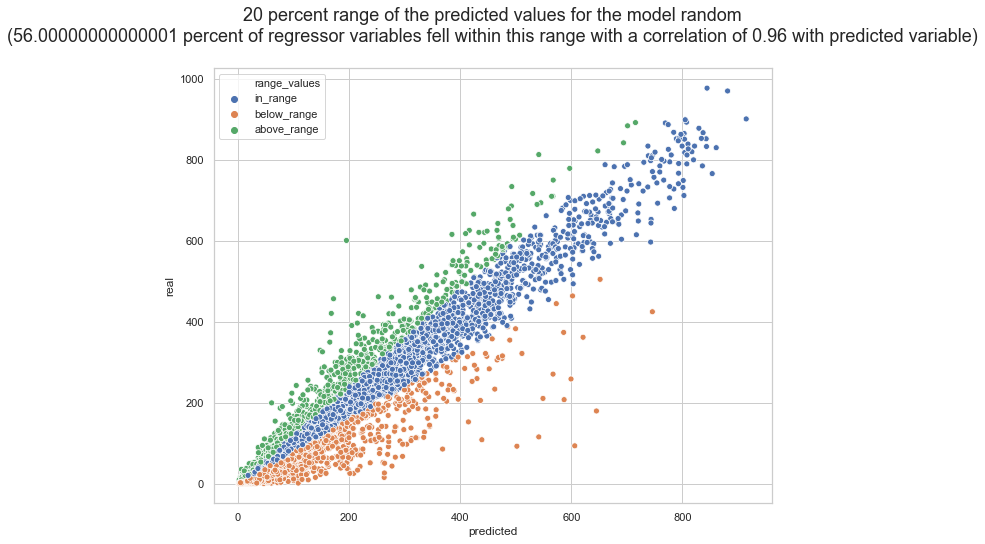

In [157]:
watch_visually(y_test, regressor.predict(X_test), 20, "random")

# Support vector machine

In [158]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train)
#y_lin = svr_lin.fit(X_train, y_train)
#y_poly = svr_poly.fit(X_train, y_train)


In [159]:
print ("for support vector regression")
print ("R_Squared for rbf for training set = {}".format(r2_score(y_train, svr_rbf.predict(X_train))))
print ("Mean-Squared Error  for rbf for training set = {}".format(mean_squared_error(y_train, svr_rbf.predict(X_train))))


print ("R_Squared for rbf for test  = {}".format(r2_score(y_test, svr_rbf.predict(X_test))))
print ("Mean-Squared Error  for rbf for test = {}".format(mean_squared_error(y_test, svr_rbf.predict(X_test))))
r=pearsonr(y_test,svr_rbf.predict(X_test))
print ("coreelation between observed and predicted ",r)

for support vector regression
R_Squared for rbf for training set = 0.9428914470540469
Mean-Squared Error  for rbf for training set = 1906.395319949985
R_Squared for rbf for test  = 0.9254805666262147
Mean-Squared Error  for rbf for test = 2377.2780006410603
coreelation between observed and predicted  (0.9621911296271064, 0.0)


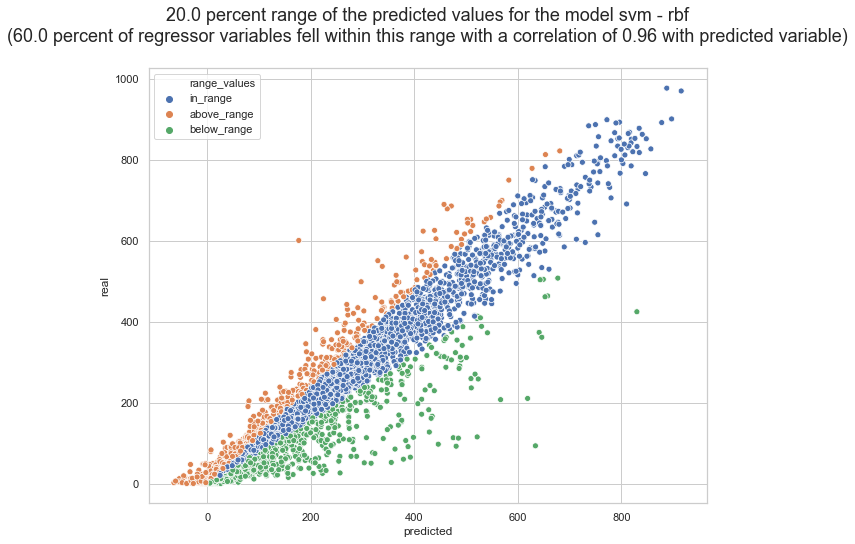

In [160]:
watch_visually(y_test,svr_rbf.predict(X_test),20.0,'svm - rbf')

In [161]:
pearsonr(y_test,svr_rbf.predict(X_test))

(0.9621911296271064, 0.0)

In [ ]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, svr_poly.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, svr_poly.predict(X_test))))

In [163]:
# now try cross valisation
#cross validation with a set of parameter values of C
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVR
import numpy as np
#create a new KNN model
value_C=[1,5,10,20,50]
spread=np.arange(len(value_C))
for i in spread:
    clf_cv = SVR(C=value_C[i],gamma='auto', kernel='rbf')
    cv_scores = cross_val_score(clf_cv, X_train, y_train, cv=5)
    #print each cv score (accuracy) and average them
    print('for the value of C ', value_C[i],cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))

for the value of C  1 [0.10859529 0.11884767 0.10015394 0.09421099 0.1260015 ]
cv_scores mean:0.10956188156046862
for the value of C  5 [0.35525564 0.36588632 0.3539576  0.33406096 0.37181908]
cv_scores mean:0.35619592029960967
for the value of C  10 [0.47033688 0.47794588 0.47332967 0.45120226 0.48413902]
cv_scores mean:0.4713907409823147
for the value of C  20 [0.56947386 0.57493695 0.57157036 0.55327534 0.57515261]
cv_scores mean:0.5688818248851686
for the value of C  50 [0.65777139 0.66343298 0.66249907 0.65251871 0.65466246]
cv_scores mean:0.6581769204765389


# run default adaboost


In [164]:
from sklearn.ensemble import AdaBoostRegressor
clf_ada = AdaBoostRegressor()
clf_ada.fit(X_train, y_train) 

print ("R_Squared for rbf = {}".format(r2_score(y_test, clf_ada.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, clf_ada.predict(X_test))))

R_Squared for rbf = 0.38589194281297334
Mean-Squared Error  for rbf = 19590.93766916256


In [165]:
#GRIDSEARCH

ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search_ada=GridSearchCV(estimator=ada,param_grid=search_grid,n_jobs=1,cv=8)
search_ada.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, search_ada.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, search_ada.predict(X_test))))

R_Squared for rbf = 0.43112816404273413
Mean-Squared Error  for rbf = 18147.836605548287


In [167]:
search_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [168]:
clf_ada_final=AdaBoostRegressor(learning_rate= 0.01, n_estimators= 1000)
clf_ada_final.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=1000, random_state=None)

In [173]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, clf_ada_final.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, clf_ada_final.predict(X_test))))

R_Squared for rbf = 0.42956904459776857
Mean-Squared Error  for rbf = 18197.574777043726


# Neural Network

In [174]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15,), random_state=1)
neural.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [175]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, neural.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, neural.predict(X_test))))

R_Squared for rbf = 0.9015575619488588
Mean-Squared Error  for rbf = 3140.4565455374805


In [176]:
from sklearn import ensemble
from sklearn import linear_model
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting = ensemble.GradientBoostingRegressor()

gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [177]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, gradient_boosting.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, gradient_boosting.predict(X_test))))

R_Squared for rbf = 0.7932382503837714
Mean-Squared Error  for rbf = 6595.999680663533


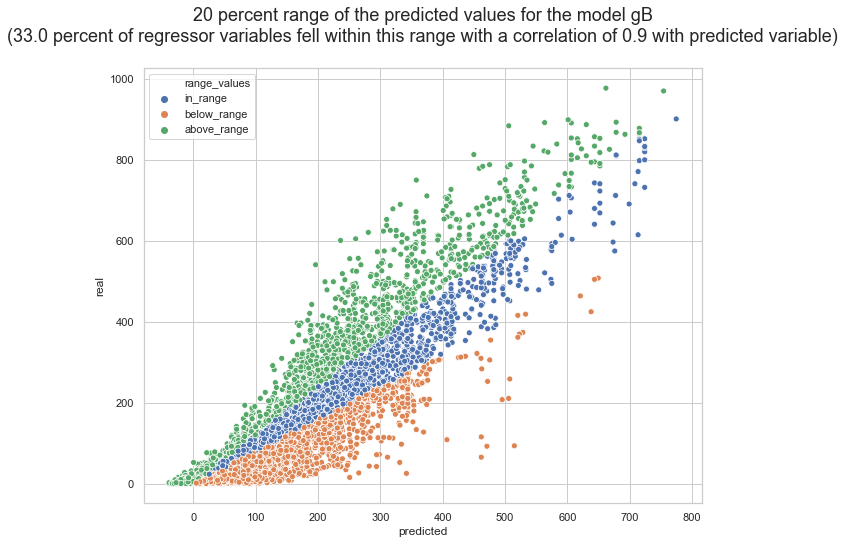

In [178]:
watch_visually(y_test,gradient_boosting.predict(X_test),20,'gB')

In [179]:
mse_train=[10616,2631,2626,604,1906]
mse_test=[10531,3047,3024,2990,2377]

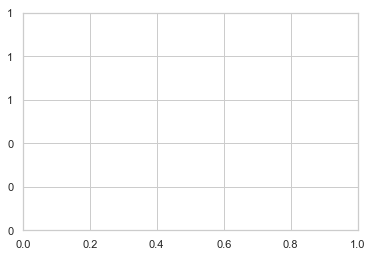

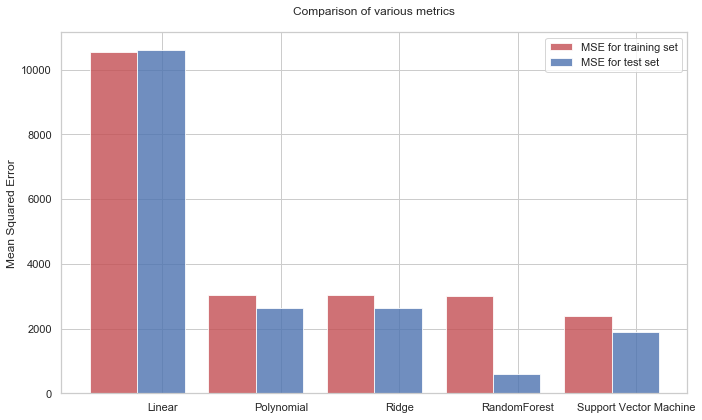

In [180]:
# create plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
index = np.arange(5)
fig, ax = plt.subplots()
plt.figure(figsize=(10,6))
#index = np.arange(n_groups)
#bar_width = 0.25
bar_width=0.4
opacity = 0.8

fake=['A','B','C','D','E']
first = plt.bar(fake, mse_test, bar_width,alpha=opacity,color='r',label='MSE for training set')

second = plt.bar(index + bar_width, mse_train, bar_width, alpha=opacity,color='b',label='MSE for test set')

#third = plt.bar(index + bar_width+bar_width, list3, bar_width, alpha=opacity,color='g',label='total increases from 2011')

#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
#plt.xlabel('\nBlue indicates total riders and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of various metrics\n')
plt.xticks(index + bar_width+.01, ('Linear','Polynomial','Ridge','RandomForest','Support Vector Machine'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# try registered bikers does not show any improvement

# now try just registered learner

In [181]:
XX=X.copy()
XX.head(2)
yy[0]

16.0

In [ ]:
# Try svm since it work very well on cnt
from sklearn.svm import SVR
svr_registered = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(XX_train,yy_train)



In [ ]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, svr_registered.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, svr_registered.predict(X_test))))

In [ ]:
watch_visually(yy_test,svr_registered.predict(XX_test),20, 'registered')

In [ ]:
# Now split the data for machine learning
from sklearn.model_selection import train_test_split
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(X,yyy,test_size=0.33, random_state=42)
print ('XXX_train ',XXX_train.shape)
print ('XXX_test ',XXX_test.shape)
print ('yyy_train ',yyy_train.shape)
print ('yyy_test ',yyy_test.shape)

In [ ]:
# Try svm since it work very well on cnt
from sklearn.svm import SVR
svr_registered = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(XXX_train,yyy_train)

In [ ]:
print ("R_Squared for rbf = {}".format(r2_score(y_test, svr_registered.predict(X_test))))
print ("Mean-Squared Error  for rbf = {}".format(mean_squared_error(y_test, svr_registered.predict(X_test))))

In [ ]:
watch_visually(yyy_test,svr_registered.predict(XXX_test),20,'caa')

In [ ]:
mse_train=[10616,2631,2626,604,1906]
mse_test=[10531,3047,3024,2990,2377]
r_train=[0.68,0.92,0.92,0.98,0.94]
r_test=[0.67,0.90,0.91,0.90,0.93]
r_corr=[0.82,0.95,0.95,0.95,0.96]
bound_20=[28,50,50,54,60]

In [ ]:
col=['MSE_Train','MSE_Test','R-2 Train','R-2 Test','Correlation','bound_20']

mn=list(zip(mse_train,mse_test,r_train,r_test,r_corr,bound_20))
xx=pd.DataFrame(mn,columns=col,index=['linear regression','polynomial','ridge regression','randomforest','support vector regression'])

# tried cross validation does do better than just train and split

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=42, shuffle=False)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    xx=X.iloc[train_index]
    yy=y.iloc[train_index]
    svr_rbf.fit(xx,yy)
    hold=mean_squared_error(y.iloc[test_index],svr_rbf.predict(X.iloc[test_index]))
    print (hold)
    #X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    #svr_rbf.fit(X.iloc[train_index], y.iloc[trian_index])
    #scores.append(svr_rbf.score(X_test, y_test))

Train Index:  [ 3476  3477  3478 ... 17376 17377 17378] 

Test Index:  [   0    1    2 ... 3473 3474 3475]
2459.0956602947585
Train Index:  [    0     1     2 ... 17376 17377 17378] 

Test Index:  [3476 3477 3478 ... 6949 6950 6951]
2583.777246305104
Train Index:  [    0     1     2 ... 17376 17377 17378] 

Test Index:  [ 6952  6953  6954 ... 10425 10426 10427]
2745.145887963798
Train Index:  [    0     1     2 ... 17376 17377 17378] 

Test Index:  [10428 10429 10430 ... 13901 13902 13903]
4927.492595436598
Train Index:  [    0     1     2 ... 13901 13902 13903] 

Test Index:  [13904 13905 13906 ... 17376 17377 17378]
